<a href="https://colab.research.google.com/github/Mar-celo/Enap/blob/master/wine_eval_exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação modelo RegLog wine

## Carregar bibliotecas de código

In [ ]:
# Carregar bibliotecas que serão utilizadas:

# Carregar Modelo de Regressão Logística
# pesquisar na documentação sklearn: https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LogisticRegression

# Carregar dados
# Veja na documentação sklearn informações sobre o dataset wine
# https://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import load_wine

## Análise exploratória do dados

In [ ]:
# Ler dados
wine = load_wine()

In [ ]:
# Analisar dimensões do dataset
print(wine.data.shape)
print(wine.target.shape)

(178, 13)
(178,)


In [ ]:
# nome das colunas
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# rótulo das classes
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
# mostrar as primeiras linhas do dataset
wine.data[0:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

## Preparação dos dados

In [ ]:
# atribui os valores das variáveis independentes a 'X'
X = wine.data
# atribui os valores da variável dependente a 'y'
y = wine.target

## Treinar o modelo

In [ ]:
# instanciar modelo de regressão logística
reg_log = LogisticRegression(max_iter=5000, solver='lbfgs', multi_class='auto') 

# treinar modelo
reg_log.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Testar o modelo (inferência)

In [ ]:
# fazer predição da espécie para uma nova flor com as dimensões:  
#[12, 2.5, 2.1, 20, 90, 2.1, 3.1, 0.2, 2.9, 6, 1, 3,1200]
lg_pred = reg_log.predict([[12, 2.5, 2.1, 20, 90, 2.1, 3.1, 0.2, 2.9, 6, 1, 3,1200]])

In [ ]:
# mostrar resultado da predição
print('nova predição:\nclasse = ', lg_pred)
print('classe = ', wine.target_names[lg_pred])

nova predição:
classe =  [0]
classe =  ['class_0']


## Avaliar qualidade do modelo


In [ ]:
# Avaliação ingênua, com todos os dados disponíveis


0.9943820224719101

In [ ]:
# Particionando os dados de forma estratificicada por tipo de vinho, em treinamento e teste
# Importar a função train_test_split de sklearn.model_selection


In [ ]:
# particionar os dados em treinamento e validação usando a função anterior:
# 20% teste, embaralhando aleatoriamente, fixando a semente aleatória e estratificando
# cria as variáveis: X_train, X_test, y_train, y_test



In [ ]:
# instanciar modelo de regressão logística
reg_log = LogisticRegression(max_iter=5000, solver='lbfgs', multi_class='auto') 

# treinar modelo nas variáveis de treinamento


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# acurácia ingênua nos dados de treinamento


0.33098591549295775

In [ ]:
# acurácia confiável em dados não utilizados no treinamento (conjunto de teste)


0.3333333333333333

A estimativa mais confiável do desempenho de um modelo para novos dados sempre será obtida com a métrica sobre um conjunto de teste, não utilizado durante o treinamento!

In [ ]:
# Normalização das variáveis
from sklearn.preprocessing import StandardScaler

In [ ]:
# instancia e ajusta o StandardScaler


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# transforma o conjunto para treino e teste (X_train_std e X_test_std)


In [ ]:
# Compare valores das variáveis originais dos vinhos com suas versões normalizadas
# Valore originais: 3 primeiras linhas


array([[1.373e+01, 1.500e+00, 2.700e+00, 2.250e+01, 1.010e+02, 3.000e+00,
        3.250e+00, 2.900e-01, 2.380e+00, 5.700e+00, 1.190e+00, 2.710e+00,
        1.285e+03],
       [1.412e+01, 1.480e+00, 2.320e+00, 1.680e+01, 9.500e+01, 2.200e+00,
        2.430e+00, 2.600e-01, 1.570e+00, 5.000e+00, 1.170e+00, 2.820e+00,
        1.280e+03],
       [1.282e+01, 3.370e+00, 2.300e+00, 1.950e+01, 8.800e+01, 1.480e+00,
        6.600e-01, 4.000e-01, 9.700e-01, 1.026e+01, 7.200e-01, 1.750e+00,
        6.850e+02]])

In [ ]:
# Valores normalizados


array([[ 0.87831942, -0.78218063,  1.28552633,  0.94403144,  0.14814407,
         1.1152683 ,  1.21502914, -0.57874076,  1.35251398,  0.24306629,
         1.06925078,  0.14411088,  1.64471067],
       [ 1.3622646 , -0.80042317, -0.07168362, -0.75245845, -0.26568789,
        -0.13233858,  0.40165675, -0.82479222, -0.04219785, -0.06004234,
         0.97955171,  0.30263285,  1.62931014],
       [-0.25088599,  0.92349602, -0.14311573,  0.05114202, -0.74849184,
        -1.25518478, -1.3540373 ,  0.32344793, -1.07531773,  2.21760251,
        -1.03867729, -1.23935358, -0.20335196]])

In [ ]:
# instanciar modelo de regressão logística
reg_log = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto') 

# treinar modelo
reg_log.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# Calcule o desempenho de teste sobre os dados normalizados


1.0

In [ ]:
# Prevendo a probabilidade de pertencimento a uma classe
# Aponte um caso com mais de 99% de probabilidade de ser uma classe específica (menor incerteza)
# E outro caso com menos de 70% de ser a classe mais provável (maior incerteza)
reg_log.predict_proba(X_test_std[:10, :])

array([[7.35554366e-03, 9.92288877e-01, 3.55579042e-04],
       [9.95895815e-01, 3.60110693e-03, 5.03077924e-04],
       [2.04502889e-04, 9.99278593e-01, 5.16904162e-04],
       [6.99392197e-04, 3.16769749e-02, 9.67623633e-01],
       [5.46714303e-03, 4.75220660e-02, 9.47010791e-01],
       [9.96292620e-01, 4.95872988e-04, 3.21150701e-03],
       [3.49593716e-02, 9.54888421e-01, 1.01522076e-02],
       [3.37369731e-04, 9.99505510e-01, 1.57120283e-04],
       [3.17101784e-01, 6.81674242e-01, 1.22397359e-03],
       [9.78888981e-01, 1.54378438e-02, 5.67317485e-03]])

In [ ]:
# a soma das probabilidades de pertencimento a cada classe é 1
reg_log.predict_proba(X_test_std[:5, :]).sum(axis=1)

array([1., 1., 1., 1., 1.])

## Encadeando pré-processamento e modelos/estimadores

Criar um objeto único `Pipeline` combinando pré-processamento e treinamento, evitando que dados do teste vazem para o treinamento e facilitando, posteriormente, validação cruzada

In [ ]:
# importar a a função make_pipeline da bilioteca sklearn.pipeline


In [ ]:
# Montar um pipeline sequenciando o StandardScaler e o LogisticRegression anteriores


In [ ]:
# Treina o encadeamento todo de uma vez


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=123, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [ ]:
# Calcula o desempenho do pipeline como um todo


1.0

## Validação cruzada (k-fold cross-validation)

In [ ]:
# Importa o modelo KNeighborsClassifier de sklearn.neighbors
# e a função cross_val_score de sklearn.model_selection


In [ ]:
# Instancia o KNN e calcula sua acurácia em 10-cross-val


array([0.68421053, 0.61111111, 0.66666667, 0.55555556, 0.66666667,
       0.55555556, 0.77777778, 0.66666667, 0.82352941, 0.75      ])

In [ ]:
# média do desempenho no 10-cross-val


0.6757739938080495

In [ ]:
# Uso de validação cruzada para identificar o número ótimo de vizinhos em KNN para wine
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7478134674922601, 0.6708032335741314, 0.7219341245270037, 0.6653573271413828, 0.6757739938080495, 0.6709128826969384, 0.663968438252494, 0.7032593739250086, 0.6980714654282766, 0.6977446680426558, 0.7144457344341245, 0.6921891124871001, 0.6918967148262813, 0.6862659098727211, 0.72000128998968, 0.708890178878569, 0.697452270381837, 0.7147381320949433, 0.7036270209838321, 0.6983638630890953, 0.7091825765393877, 0.7147381320949433, 0.7314047987616099, 0.7026057791537668, 0.7147381320949433, 0.7147381320949433, 0.7091825765393878, 0.7147381320949433, 0.7147381320949433, 0.7147381320949433]


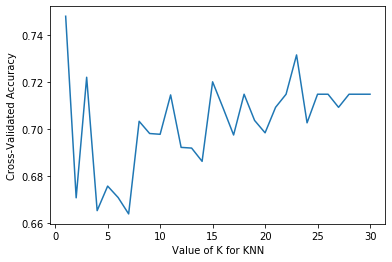

In [ ]:
import matplotlib.pyplot as plt

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

In [ ]:
# o mesmo, mas agora com normalização dos dados: StandardScaler().fit(X).transform(X)
# Uso de validação cruzada para identificar o número ótimo de vizinhos em KNN para Iris
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, StandardScaler().fit(X).transform(X), y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9439735982112143, 0.9384180426556588, 0.954499914000688, 0.9492367561059512, 0.9666322669418644, 0.9551943584451325, 0.9663398692810456, 0.9666322669418644, 0.97218782249742, 0.9666322669418644, 0.9718954248366012, 0.9610767113863089, 0.9666322669418644, 0.9669590643274854, 0.9666322669418644, 0.9610767113863089, 0.9725146198830409, 0.9666322669418644, 0.9725146198830409, 0.9725146198830409, 0.9725146198830409, 0.9780701754385965, 0.9833333333333334, 0.9833333333333334, 0.9718954248366012, 0.9604575163398692, 0.9660130718954247, 0.9660130718954247, 0.9660130718954247, 0.9660130718954247]


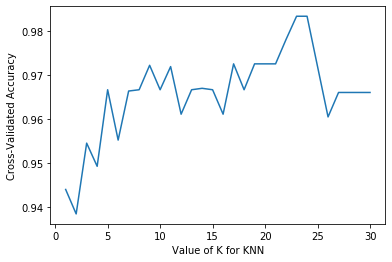

In [ ]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

Conclusões?

Como escolher se devemos ou não reescalar as variáveis?

Como determinar o valor ideal de K para o KNN?